In [1]:
# Imports
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report
from fbprophet import Prophet

In [2]:
# Import the CSV data into pandas dataframes

btc_df = pd.read_csv(Path('data/BTC_USD.csv'), index_col='Date', parse_dates=True, infer_datetime_format=True)
eth_df = pd.read_csv(Path('data/ETH_USD.csv'), index_col='Date', parse_dates=True, infer_datetime_format=True)
ada_df = pd.read_csv(Path('data/ADA_USD.csv'), index_col='Date', parse_dates=True, infer_datetime_format=True)
ltc_df = pd.read_csv(Path('data/LTC_USD.csv'), index_col='Date', parse_dates=True, infer_datetime_format=True)

# Check the first 5 rows of each dataframe
display(btc_df.head())
display(eth_df.head())
display(ada_df.head())
display(ltc_df.head())

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-09-30,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-01,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-02,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-03,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-04,BTC,121.33866,118.67466,121.93633,118.00566


,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2015-08-08,ETH,0.909046,1.749289,1.916540,0.794497
2015-08-09,ETH,0.692321,0.909046,0.909046,0.692321
2015-08-10,ETH,0.668067,0.692321,0.692321,0.654331
2015-08-11,ETH,0.850151,0.668067,1.148621,0.668067
2015-08-12,ETH,1.266023,0.850151,1.266023,0.850151


,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2018-05-31,ADA,0.218973,0.224155,0.224991,0.216746
2018-06-01,ADA,0.219180,0.223207,0.227988,0.213887
2018-06-02,ADA,0.227665,0.220317,0.228962,0.216588
2018-06-03,ADA,0.226597,0.226565,0.236650,0.222872
2018-06-04,ADA,0.213313,0.226409,0.230272,0.209228


,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2018-05-31,LTC,117.475053,118.974662,119.628628,117.006761
2018-06-01,LTC,119.934676,118.307052,120.452653,117.390816
2018-06-02,LTC,123.222694,120.171853,124.229394,118.542360
2018-06-03,LTC,125.365456,123.500674,127.920242,122.112908
2018-06-04,LTC,119.522003,124.869538,126.883812,118.303633


In [3]:
# Review the data types of the DataFrame using the info function
btc_df.info()
eth_df.info()
ada_df.info()
ltc_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2838 entries, 2013-09-30 to 2021-07-07
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2838 non-null   object 
 1   Closing Price (USD)  2838 non-null   float64
 2   24h Open (USD)       2838 non-null   float64
 3   24h High (USD)       2838 non-null   float64
 4   24h Low (USD)        2838 non-null   float64
dtypes: float64(4), object(1)
memory usage: 133.0+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2161 entries, 2015-08-08 to 2021-07-07
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2161 non-null   object 
 1   Closing Price (USD)  2161 non-null   float64
 2   24h Open (USD)       2161 non-null   float64
 3   24h High (USD)       2161 non-null   float64
 4   24h Low (USD)        2161 non-null   float6

In [4]:
# Filter the data index and Closing Price (USD) 
btc_sliced_df = btc_df.loc["2018-05-31" :, ["Closing Price (USD)"]]
eth_sliced_df = eth_df.loc["2018-05-31" :, ["Closing Price (USD)"]]
ada_sliced_df = ada_df.loc["2018-05-31" :, ["Closing Price (USD)"]]
ltc_sliced_df = ltc_df.loc["2018-05-31" :, ["Closing Price (USD)"]]
display(btc_sliced_df.head())
display(eth_sliced_df.head())
display(ada_sliced_df.head())
display(ltc_sliced_df.head())

,Closing Price (USD)
Date,
2018-05-31,7490.621250
2018-06-01,7518.333329
2018-06-02,7630.403388
2018-06-03,7716.145068
2018-06-04,7505.589277


,Closing Price (USD)
Date,
2018-05-31,570.865740
2018-06-01,577.257364
2018-06-02,591.381123
2018-06-03,618.302767
2018-06-04,591.549075


,Closing Price (USD)
Date,
2018-05-31,0.218973
2018-06-01,0.219180
2018-06-02,0.227665
2018-06-03,0.226597
2018-06-04,0.213313


,Closing Price (USD)
Date,
2018-05-31,117.475053
2018-06-01,119.934676
2018-06-02,123.222694
2018-06-03,125.365456
2018-06-04,119.522003


### Forecasting

## Step 1: Prepare the data to fit the Prophet model. Create four new Data Frames: one for each asset. Recall setting the column names to "ds" for the dates and "y" for the trend values.

In [5]:
# Create a DataFrame for Bitcoin, reset index and rename the columns to the Prophet model syntax
btc_rename_df = btc_sliced_df.reset_index()
btc_rename_df = btc_rename_df.rename(columns={"Date":"ds", "Closing Price (USD)":"y"})
btc_rename_df.head() 

,ds,y
0,2018-05-31,7490.621250
1,2018-06-01,7518.333329
2,2018-06-02,7630.403388
3,2018-06-03,7716.145068
4,2018-06-04,7505.589277


In [6]:
# Create a DataFrame for Ethereum, reset index and rename the columns to the Prophet model syntax
eth_rename_df =  eth_sliced_df.reset_index()
eth_rename_df = eth_rename_df.rename(columns={"Date":"ds", "Closing Price (USD)":"y"})
eth_rename_df.head()

,ds,y
0,2018-05-31,570.865740
1,2018-06-01,577.257364
2,2018-06-02,591.381123
3,2018-06-03,618.302767
4,2018-06-04,591.549075


In [7]:
# Create a DataFrame for Cardano, reset index and rename the columns to the Prophet model syntax
ada_rename_df = ada_sliced_df.reset_index()
ada_rename_df = ada_rename_df.rename(columns={"Date":"ds", "Closing Price (USD)":"y"})
ada_rename_df.head()

,ds,y
0,2018-05-31,0.218973
1,2018-06-01,0.219180
2,2018-06-02,0.227665
3,2018-06-03,0.226597
4,2018-06-04,0.213313


In [8]:
# Create a DataFrame for Litecoin, reset index and rename the columns to the Prophet model syntax
ltc_rename_df = ltc_sliced_df.reset_index()
ltc_rename_df = ltc_rename_df.rename(columns={"Date":"ds", "Closing Price (USD)":"y"})
ltc_rename_df.head()

,ds,y
0,2018-05-31,117.475053
1,2018-06-01,119.934676
2,2018-06-02,123.222694
3,2018-06-03,125.365456
4,2018-06-04,119.522003


## Step 2:  Create four Prophets models, one for each asset

In [9]:
# Create a Prophet model for Bitcoin
model_btc = Prophet()

In [10]:
# Create a Prophet model for Ethereum
model_eth = Prophet()

In [11]:
# Create a Prophet model for Cardano
model_ada = Prophet()

In [12]:
# Create a Prophet model for Litecoin
model_ltc = Prophet()

## Step 3: Fit the Prophet models

In [13]:
# Fit the Bitcoin
model_btc.fit(btc_rename_df)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
# Fit the Ethereum
model_eth.fit(eth_rename_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [15]:
# Fit the Cardano
model_ada.fit(ada_rename_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
# Fit the Litecoin
model_ltc.fit(ltc_rename_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Step 4: Use the make_future_dataframe function to forecast one year of trend dates.

In [17]:
# Forecast one year of weekly future trends data for Bitcoin, set periods=52 because of year has 52 weeks. freq paramer to "d" of daily
future_bitcoin = model_btc.make_future_dataframe(periods=252, freq="d")

# Display the last five rows of the future_bitcoin_ DataFrame
future_bitcoin.tail()

,ds
1381,2022-03-12
1382,2022-03-13
1383,2022-03-14
1384,2022-03-15
1385,2022-03-16


In [18]:
# Forecast one year of weekly future trends data for ethereum , set periods=52 because of year has 52 weeks. freq paramer to "d" of daily
future_ethereum = model_eth.make_future_dataframe(periods=252, freq="d")

# Display the last five rows of the future_bitcoin_ DataFrame
future_ethereum.tail()

,ds
1381,2022-03-12
1382,2022-03-13
1383,2022-03-14
1384,2022-03-15
1385,2022-03-16


In [19]:
# Forecast one year of weekly future trends data for cardano, set periods=52 because of year has 52 weeks. freq paramer to "d" of daily
future_cardano = model_ada.make_future_dataframe(periods=252, freq="d")

# Display the last five rows of the future_bitcoin_ DataFrame
future_cardano.tail()

,ds
1381,2022-03-12
1382,2022-03-13
1383,2022-03-14
1384,2022-03-15
1385,2022-03-16


In [20]:
# Forecast one year of weekly future trends data for litecoin, set periods=52 because of year has 52 weeks. freq paramer to "d" of daily
future_litecoin = model_ltc.make_future_dataframe(periods=252, freq="d")

# Display the last five rows of the future_bitcoin_ DataFrame
future_litecoin.tail()

,ds
1381,2022-03-12
1382,2022-03-13
1383,2022-03-14
1384,2022-03-15
1385,2022-03-16


## Step  5: Predict the future trends data by using the ```predict``` method for four of the asset models

In [21]:
# Make predictions for Bitcoin using future_bitcoin DateFrame
forecast_bitcoin = model_btc.predict(future_bitcoin)

# Display the first five rows of the forecast_canada DataFrame
forecast_bitcoin.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-05-31,8699.903796,6504.719428,12217.610815,8699.903796,8699.903796,636.399048,636.399048,636.399048,5.968690,5.968690,5.968690,630.430358,630.430358,630.430358,0.0,0.0,0.0,9336.302844
1,2018-06-01,8789.951521,6419.544033,12183.984949,8789.951521,8789.951521,341.249375,341.249375,341.249375,-9.386527,-9.386527,-9.386527,350.635902,350.635902,350.635902,0.0,0.0,0.0,9131.200897
2,2018-06-02,8879.999247,6226.111162,11885.889830,8879.999247,8879.999247,109.323617,109.323617,109.323617,19.066295,19.066295,19.066295,90.257322,90.257322,90.257322,0.0,0.0,0.0,8989.322865
3,2018-06-03,8970.046973,5956.243035,11796.670789,8970.046973,8970.046973,-194.896867,-194.896867,-194.896867,-42.541652,-42.541652,-42.541652,-152.355215,-152.355215,-152.355215,0.0,0.0,0.0,8775.150106
4,2018-06-04,9060.094699,5694.338294,11604.767482,9060.094699,9060.094699,-400.484928,-400.484928,-400.484928,-21.427943,-21.427943,-21.427943,-379.056985,-379.056985,-379.056985,0.0,0.0,0.0,8659.609771


In [22]:
# Make predictions for Ethereum using future_ethereum DateFrame
forecast_ethereum = model_eth.predict(future_ethereum)

# Display the first five rows of the forecast_canada DataFrame
forecast_ethereum.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-05-31,521.111136,417.920176,881.617600,521.111136,521.111136,135.470841,135.470841,135.470841,2.189760,2.189760,2.189760,133.281081,133.281081,133.281081,0.0,0.0,0.0,656.581977
1,2018-06-01,519.580745,409.813093,857.230874,519.580745,519.580745,115.108899,115.108899,115.108899,-4.436570,-4.436570,-4.436570,119.545470,119.545470,119.545470,0.0,0.0,0.0,634.689645
2,2018-06-02,518.050355,398.412163,834.038315,518.050355,518.050355,103.730963,103.730963,103.730963,-3.218674,-3.218674,-3.218674,106.949637,106.949637,106.949637,0.0,0.0,0.0,621.781318
3,2018-06-03,516.519964,392.549376,827.606208,516.519964,516.519964,92.386853,92.386853,92.386853,-3.027060,-3.027060,-3.027060,95.413914,95.413914,95.413914,0.0,0.0,0.0,608.906817
4,2018-06-04,514.989573,379.384200,828.362687,514.989573,514.989573,85.928976,85.928976,85.928976,1.092768,1.092768,1.092768,84.836208,84.836208,84.836208,0.0,0.0,0.0,600.918549


In [23]:
# Make predictions for cardano using future_cardano DateFrame
forecast_cardano = model_ada.predict(future_cardano)

# Display the first five rows of the forecast_canada DataFrame
forecast_cardano.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-05-31,0.156883,0.148565,0.385365,0.156883,0.156883,0.111757,0.111757,0.111757,0.002799,0.002799,0.002799,0.108957,0.108957,0.108957,0.0,0.0,0.0,0.268640
1,2018-06-01,0.156624,0.144451,0.363499,0.156624,0.156624,0.100598,0.100598,0.100598,-0.001202,-0.001202,-0.001202,0.101800,0.101800,0.101800,0.0,0.0,0.0,0.257222
2,2018-06-02,0.156364,0.124412,0.367739,0.156364,0.156364,0.095051,0.095051,0.095051,0.000479,0.000479,0.000479,0.094572,0.094572,0.094572,0.0,0.0,0.0,0.251415
3,2018-06-03,0.156105,0.131723,0.364095,0.156105,0.156105,0.087969,0.087969,0.087969,0.000668,0.000668,0.000668,0.087301,0.087301,0.087301,0.0,0.0,0.0,0.244074
4,2018-06-04,0.155846,0.125332,0.348668,0.155846,0.155846,0.077910,0.077910,0.077910,-0.002102,-0.002102,-0.002102,0.080012,0.080012,0.080012,0.0,0.0,0.0,0.233756


In [24]:
# Make predictions for Litecoin using future_litecoin DateFrame
forecast_litecoin = model_ltc.predict(future_litecoin)

# Display the first five rows of the forecast_canada DataFrame
forecast_litecoin.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-05-31,113.076248,90.379691,149.985760,113.076248,113.076248,6.991947,6.991947,6.991947,-0.368943,-0.368943,-0.368943,7.360890,7.360890,7.360890,0.0,0.0,0.0,120.068196
1,2018-06-01,112.737748,88.821799,146.906693,112.737748,112.737748,6.035740,6.035740,6.035740,-0.166602,-0.166602,-0.166602,6.202342,6.202342,6.202342,0.0,0.0,0.0,118.773488
2,2018-06-02,112.399248,90.583177,146.830935,112.399248,112.399248,5.661197,5.661197,5.661197,0.474918,0.474918,0.474918,5.186279,5.186279,5.186279,0.0,0.0,0.0,118.060445
3,2018-06-03,112.060748,88.311436,144.092977,112.060748,112.060748,4.240340,4.240340,4.240340,-0.059991,-0.059991,-0.059991,4.300331,4.300331,4.300331,0.0,0.0,0.0,116.301088
4,2018-06-04,111.722247,88.655663,145.274587,111.722247,111.722247,3.376986,3.376986,3.376986,-0.152492,-0.152492,-0.152492,3.529477,3.529477,3.529477,0.0,0.0,0.0,115.099233


# Step 6: Plot Prophet's predictions by using the ```plot```funcion. 

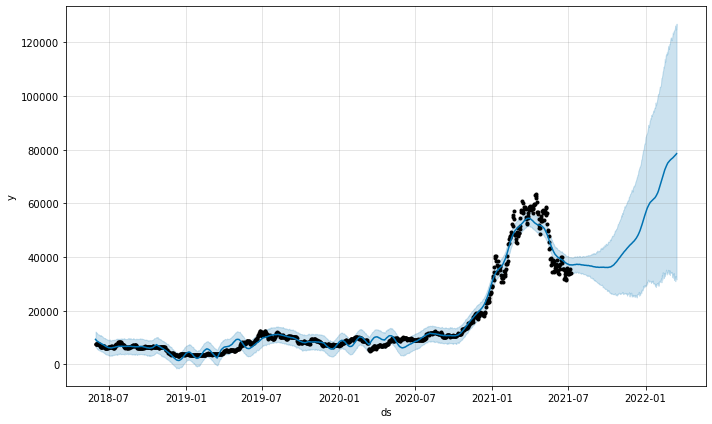

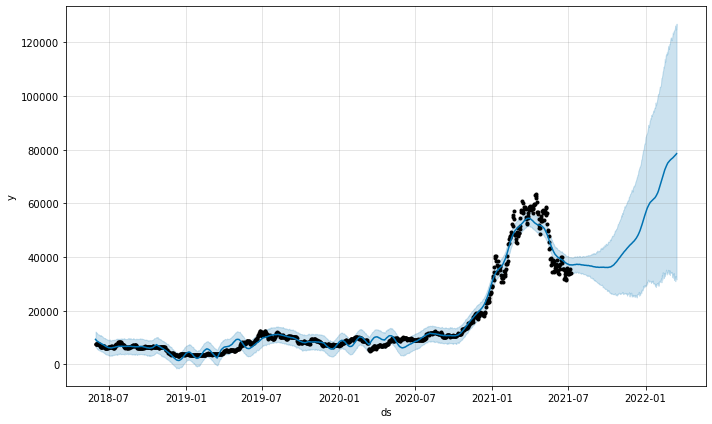

In [25]:
# Plot the Prophet predictions for Bitcoin
model_btc.plot(forecast_bitcoin)

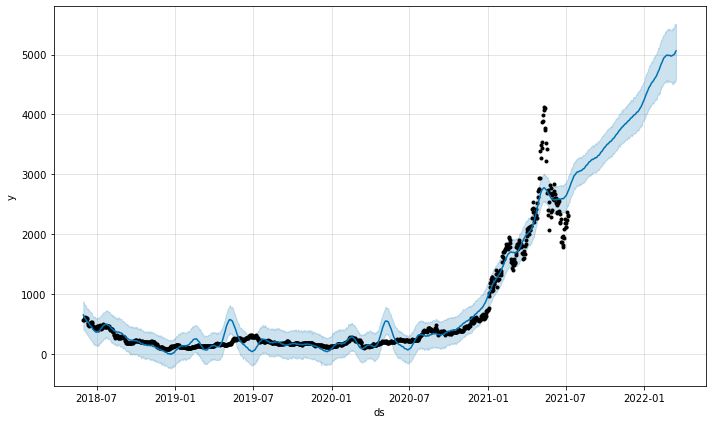

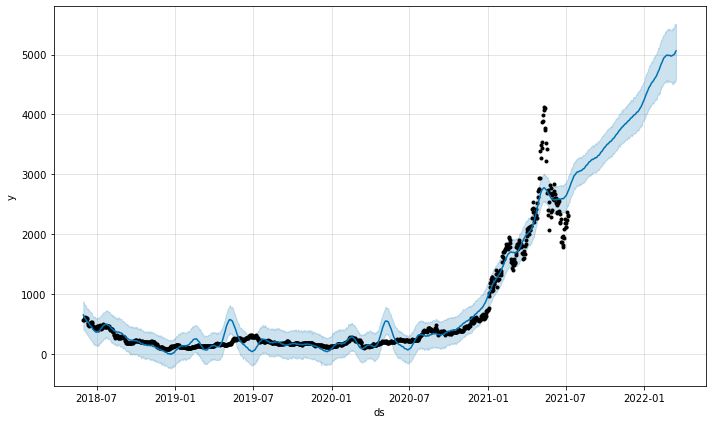

In [26]:
# Plot the Prophet predictions for Ethereum
model_eth.plot(forecast_ethereum)

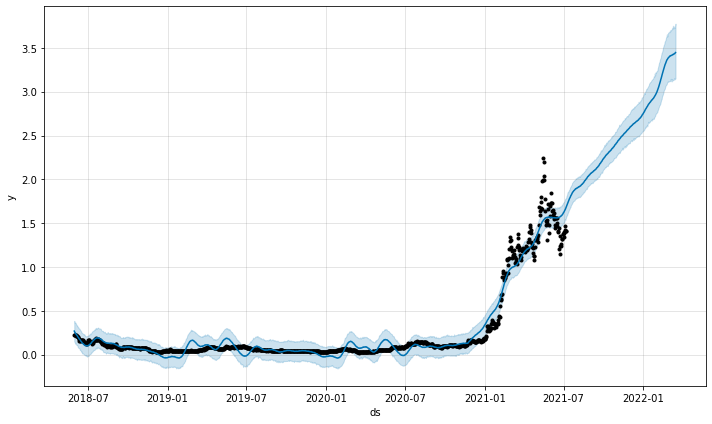

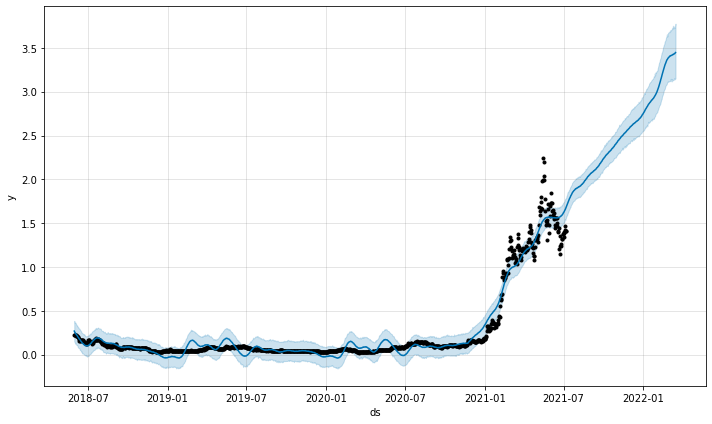

In [27]:
# Plot the Prophet predictions for Cardano
model_ada.plot(forecast_cardano)

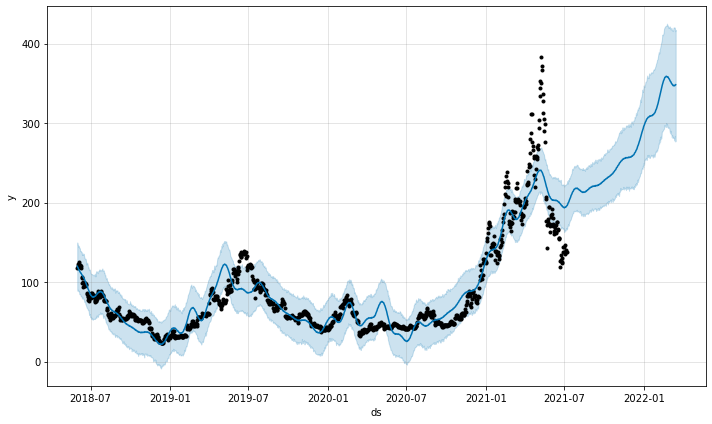

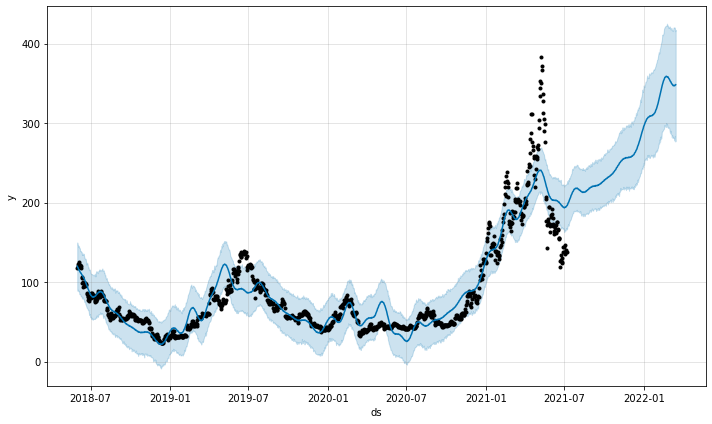

In [28]:
# Plot the Prophet predictions for Litecoin
model_ltc.plot(forecast_litecoin)

## Step 7: Analyze the forecast results by plotting the forecast DataFrame's "yhat", "yhat_lower", and "yhat"upper" columns for each the asset models. Set the "ds" column as the DataFrame index before creating these plots.


In [29]:
# Set the index in the forecast_bitcoin DataFrame to the ds datetime column
forecast_bitcoin = forecast_bitcoin.set_index("ds")

# Display the forecast_bitcoin DataFrame
forecast_bitcoin.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,
2018-05-31,8699.903796,6504.719428,12217.610815,8699.903796,8699.903796,636.399048,636.399048,636.399048,5.968690,5.968690,5.968690,630.430358,630.430358,630.430358,0.0,0.0,0.0,9336.302844
2018-06-01,8789.951521,6419.544033,12183.984949,8789.951521,8789.951521,341.249375,341.249375,341.249375,-9.386527,-9.386527,-9.386527,350.635902,350.635902,350.635902,0.0,0.0,0.0,9131.200897
2018-06-02,8879.999247,6226.111162,11885.889830,8879.999247,8879.999247,109.323617,109.323617,109.323617,19.066295,19.066295,19.066295,90.257322,90.257322,90.257322,0.0,0.0,0.0,8989.322865
2018-06-03,8970.046973,5956.243035,11796.670789,8970.046973,8970.046973,-194.896867,-194.896867,-194.896867,-42.541652,-42.541652,-42.541652,-152.355215,-152.355215,-152.355215,0.0,0.0,0.0,8775.150106
2018-06-04,9060.094699,5694.338294,11604.767482,9060.094699,9060.094699,-400.484928,-400.484928,-400.484928,-21.427943,-21.427943,-21.427943,-379.056985,-379.056985,-379.056985,0.0,0.0,0.0,8659.609771


In [30]:
# Set the index in the forecast_ethereum DataFrame to the ds datetime column
forecast_ethereum = forecast_ethereum.set_index("ds")

# Display the forecast_bitcoin DataFrame
forecast_ethereum.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,
2018-05-31,521.111136,417.920176,881.617600,521.111136,521.111136,135.470841,135.470841,135.470841,2.189760,2.189760,2.189760,133.281081,133.281081,133.281081,0.0,0.0,0.0,656.581977
2018-06-01,519.580745,409.813093,857.230874,519.580745,519.580745,115.108899,115.108899,115.108899,-4.436570,-4.436570,-4.436570,119.545470,119.545470,119.545470,0.0,0.0,0.0,634.689645
2018-06-02,518.050355,398.412163,834.038315,518.050355,518.050355,103.730963,103.730963,103.730963,-3.218674,-3.218674,-3.218674,106.949637,106.949637,106.949637,0.0,0.0,0.0,621.781318
2018-06-03,516.519964,392.549376,827.606208,516.519964,516.519964,92.386853,92.386853,92.386853,-3.027060,-3.027060,-3.027060,95.413914,95.413914,95.413914,0.0,0.0,0.0,608.906817
2018-06-04,514.989573,379.384200,828.362687,514.989573,514.989573,85.928976,85.928976,85.928976,1.092768,1.092768,1.092768,84.836208,84.836208,84.836208,0.0,0.0,0.0,600.918549


In [31]:
# Set the index in the forecast_cardano DataFrame to the ds datetime column
forecast_cardano = forecast_cardano.set_index("ds")

# Display the forecast_bitcoin DataFrame
forecast_cardano.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,
2018-05-31,0.156883,0.148565,0.385365,0.156883,0.156883,0.111757,0.111757,0.111757,0.002799,0.002799,0.002799,0.108957,0.108957,0.108957,0.0,0.0,0.0,0.268640
2018-06-01,0.156624,0.144451,0.363499,0.156624,0.156624,0.100598,0.100598,0.100598,-0.001202,-0.001202,-0.001202,0.101800,0.101800,0.101800,0.0,0.0,0.0,0.257222
2018-06-02,0.156364,0.124412,0.367739,0.156364,0.156364,0.095051,0.095051,0.095051,0.000479,0.000479,0.000479,0.094572,0.094572,0.094572,0.0,0.0,0.0,0.251415
2018-06-03,0.156105,0.131723,0.364095,0.156105,0.156105,0.087969,0.087969,0.087969,0.000668,0.000668,0.000668,0.087301,0.087301,0.087301,0.0,0.0,0.0,0.244074
2018-06-04,0.155846,0.125332,0.348668,0.155846,0.155846,0.077910,0.077910,0.077910,-0.002102,-0.002102,-0.002102,0.080012,0.080012,0.080012,0.0,0.0,0.0,0.233756


In [32]:
# Set the index in the forecast_litecoin DataFrame to the ds datetime column
forecast_litecoin = forecast_litecoin.set_index("ds")

# Display the forecast_bitcoin DataFrame
forecast_litecoin.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,
2018-05-31,113.076248,90.379691,149.985760,113.076248,113.076248,6.991947,6.991947,6.991947,-0.368943,-0.368943,-0.368943,7.360890,7.360890,7.360890,0.0,0.0,0.0,120.068196
2018-06-01,112.737748,88.821799,146.906693,112.737748,112.737748,6.035740,6.035740,6.035740,-0.166602,-0.166602,-0.166602,6.202342,6.202342,6.202342,0.0,0.0,0.0,118.773488
2018-06-02,112.399248,90.583177,146.830935,112.399248,112.399248,5.661197,5.661197,5.661197,0.474918,0.474918,0.474918,5.186279,5.186279,5.186279,0.0,0.0,0.0,118.060445
2018-06-03,112.060748,88.311436,144.092977,112.060748,112.060748,4.240340,4.240340,4.240340,-0.059991,-0.059991,-0.059991,4.300331,4.300331,4.300331,0.0,0.0,0.0,116.301088
2018-06-04,111.722247,88.655663,145.274587,111.722247,111.722247,3.376986,3.376986,3.376986,-0.152492,-0.152492,-0.152492,3.529477,3.529477,3.529477,0.0,0.0,0.0,115.099233


In [33]:
# Plot predictions for our 252 day peiods for bitcoin
forecast_bitcoin[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-252:,:].hvplot()

:NdOverlay   [Variable]
   :Curve   [ds]   (value)

In [34]:
# Plot predictions for our 252 day peiods for ethereum
forecast_ethereum[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-252:,:].hvplot()

:NdOverlay   [Variable]
   :Curve   [ds]   (value)

In [35]:
# Plot predictions for our 252 day peiods for cardano
forecast_cardano[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-252:,:].hvplot()

:NdOverlay   [Variable]
   :Curve   [ds]   (value)

In [36]:
# Plot predictions for our 252 day peiods for litecoin
forecast_litecoin[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-252:,:].hvplot()

:NdOverlay   [Variable]
   :Curve   [ds]   (value)

# Step 8: Use the ```plot_component``` funtion from Prophet models to analyze the patterns of the Google Trends times series data for the assets models. Bes sure to reset the index by converting "ds" back to a column before creating these plots. 

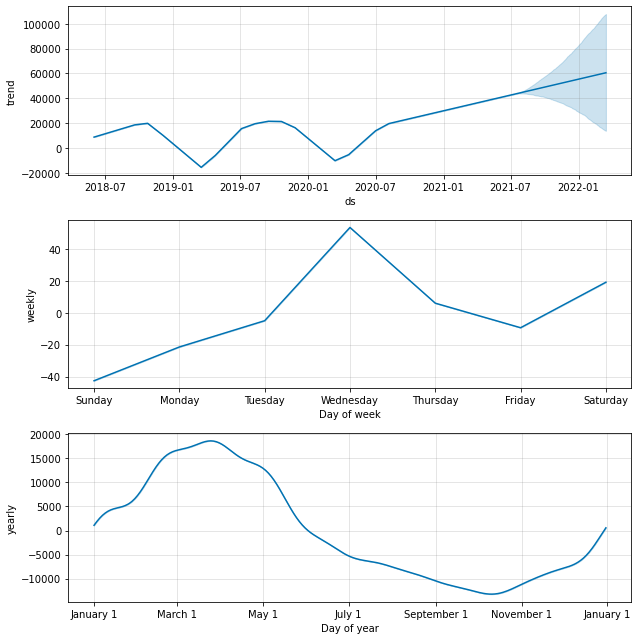

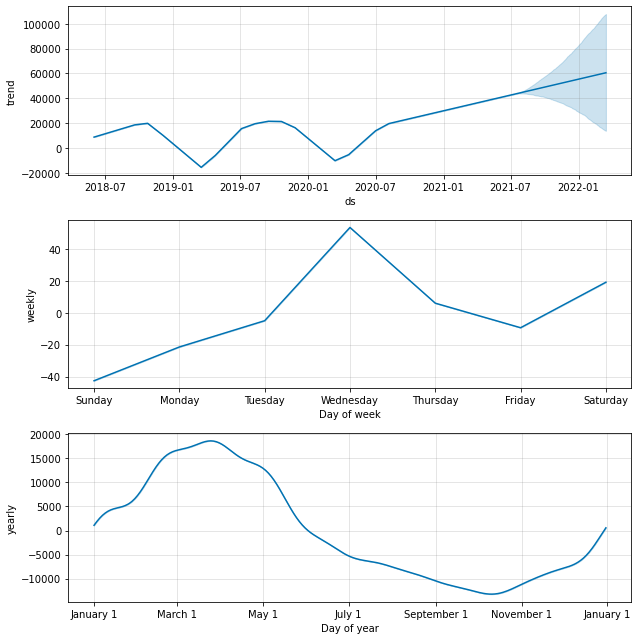

In [37]:
# Reset the index in the forecast_bitcoin DataFrame
forecast_bitcoin = forecast_bitcoin.reset_index()

# Use the plot_components function to visualize the forexast results
# for the forecast_bitcoin DataFrame
model_btc.plot_components(forecast_bitcoin)